# Testing and Evaluating Models

In [16]:
# numpy
import numpy as np

# get scikit-learn's datasets
from sklearn import datasets

# get some model selection tools
from sklearn.model_selection import train_test_split, KFold

# load various models from scikit-learn's library
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# also get some metrics to try
from sklearn.metrics import *

# matplotlib for graphs
import matplotlib.pyplot as plt

# itertools
import itertools

In [17]:
# Get a binary classification problem
X, y = datasets.make_moons(n_samples=1000, noise=0.3)

In [18]:
print("Feature data shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], X.shape)])))
print("Target data shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], y.shape)])))

Feature data shape: rows 1000; columns 2
Target data shape: rows 1000


Scikit-learns's [classfication metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [22]:
classification_metrics = {"precision_recall_curve" : "Compute precision-recall pairs for different probability thresholds", 
                            "roc_curve" : "Compute Receiver operating characteristic (ROC)", 
                            "cohen_kappa_score" : "Cohen’s kappa: a statistic that measures inter-annotator agreement.", 
                            "confusion_matrix" : "Compute confusion matrix to evaluate the accuracy of a classification", 
                            "hinge_loss" : "Average hinge loss (non-regularized)", 
                            "matthews_corrcoef" : "Compute the Matthews correlation coefficient (MCC)", 
                            "accuracy_score" : "Accuracy classification score.", 
                            "classification_report" : "Build a text report showing the main classification metrics", 
                            "f1_score" : "Compute the F1 score, also known as balanced F-score or F-measure", 
                            "hamming_loss" : "Compute the average Hamming loss.", 
                            "jaccard_similarity_score" : "Jaccard similarity coefficient score", 
                            "log_loss" : "Log loss, aka logistic loss or cross-entropy loss.", 
                            "precision_recall_fscore_support" : "Compute precision, recall, F-measure and support for each class", 
                            "precision_score" : "Compute the precision", 
                            "recall_score" : "Compute the recall", 
                            "zero_one_loss" : "Zero-one classification loss.", 
                            "average_precision_score" : "Compute average precision (AP) from prediction scores", 
                            "roc_auc_score" : "Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores."
                         }

In [24]:
model = LogisticRegression()
# fit instance
fit = model.fit(X=X, y=y)

for key, value in classification_metrics.items():
    print("*** {0} ***".format(key))
    print(value)
    print(getattr(sklearn.metrics, key)(y, model.predict(X=X)))
    print("---")

*** precision_recall_curve ***
Compute precision-recall pairs for different probability thresholds
(array([0.5       , 0.85020243, 1.        ]), array([1.  , 0.84, 0.  ]), array([0, 1]))
---
*** roc_curve ***
Compute Receiver operating characteristic (ROC)
(array([0.   , 0.148, 1.   ]), array([0.  , 0.84, 1.  ]), array([2, 1, 0]))
---
*** cohen_kappa_score ***
Cohen’s kappa: a statistic that measures inter-annotator agreement.
0.692
---
*** confusion_matrix ***
Compute confusion matrix to evaluate the accuracy of a classification
[[426  74]
 [ 80 420]]
---
*** hinge_loss ***
Average hinge loss (non-regularized)
0.654
---
*** matthews_corrcoef ***
Compute the Matthews correlation coefficient (MCC)
0.6920498293816378
---
*** accuracy_score ***
Accuracy classification score.
0.846
---
*** classification_report ***
Build a text report showing the main classification metrics
             precision    recall  f1-score   support

          0       0.84      0.85      0.85       500
          

In [ ]:
house_prices = datasets.load_boston()

# Make things a bit cleaner
X = house_prices.data
y = house_prices.target

In [2]:
print("Features: {0}".format(", ".join(house_prices.feature_names)))
print("Feature data shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], X.shape)])))
print("Target data shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], y.shape)])))

Features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
Feature data shape: rows 506; columns 13
Target data shape: rows 506


Scikit-learn's [regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

In [28]:
regression_metrics = {
                        "explained_variance_score" : "Explained variance regression score function", 
                        "mean_absolute_error" : "Mean absolute error regression loss", 
                        "mean_squared_error" : "Mean squared error regression loss", 
                        "mean_squared_log_error" : "Mean squared logarithmic error regression loss", 
                        "median_absolute_error" : "Median absolute error regression loss", 
                        "r2_score" : "R^2 (coefficient of determination) regression score function."
                    }

In [29]:
model = LinearRegression()
# fit instance
fit = model.fit(X=X, y=y)

for key, value in regression_metrics.items():
    print("*** {0} ***".format(key))
    print(value)
    print(getattr(sklearn.metrics, key)(y, model.predict(X=X)))
    print("---")

*** explained_variance_score ***
Explained variance regression score function
0.5440373003850014
---
*** mean_absolute_error ***
Mean absolute error regression loss
0.2633147734163758
---
*** mean_squared_error ***
Mean squared error regression loss
0.11399067490374966
---
*** mean_squared_log_error ***
Mean squared logarithmic error regression loss
0.0570926337011185
---
*** median_absolute_error ***
Median absolute error regression loss
0.20669790079050793
---
*** r2_score ***
R^2 (coefficient of determination) regression score function.
0.5440373003850014
---


## Train-test Splits

In the examples above we evaluated the model's performance by only considering its performance with the training set. Since the model already learns from this data, it's expected to familiar with it. If the model overfits, this kind of evaluation won't detect it.

By using a test set kept separate from the model's training, we can get a glimpse of how the model reacts in an unexpected situation. Hopefully this tells us how well the model will perform in real-life situations.

In [30]:
house_prices = datasets.load_boston()

# Make things a bit cleaner
X = house_prices.data
y = house_prices.target

Scikit-learn's `train_test_split` function will split a dataset for you. Using the `shuffle` option is a good idea if the dataset is sorted in some way but you want a randomized test set. Set the `random_state` option if you want a randomized test set that will stay the same each time you run your code.

Picking a randomized test set is common practice, but there are sometimes motivations for not doing it, which will be explained below.

If your dataset has duplicates, they should be removed since otherwise some data will be in both the training set and the test set, making their split imperfect.

In [31]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1234)

print("Training data X shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], X_train.shape)])))
print("Training data y shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], y_train.shape)])))
print("Test data X shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], X_test.shape)])))
print("Test data y shape: {0}".format("; ".join([" ".join(map(str, i)) for i in zip(["rows", "columns"], y_test.shape)])))

Training data X shape: rows 379; columns 13
Training data y shape: rows 379
Test data X shape: rows 127; columns 13
Test data y shape: rows 127


In [33]:
regressors = {"OLS" : LinearRegression(), 
              "KNN" : KNeighborsRegressor(), 
              "DecisionTrees" : DecisionTreeRegressor(), 
              "AdaBoost" : AdaBoostRegressor(random_state=1234), 
              "Random Forests" : RandomForestRegressor(random_state=1234), 
              "GradientBoost" : GradientBoostingRegressor(random_state=1234)
             }

# You can use the zip() function to iterate over multiple series
for name, regressor in regressors.items():
    model = regressor
    # fit instance
    fit = model.fit(X=X_train, y=y_train)
    # R^2
    train_score = r2_score(y_true = y_train, y_pred = model.predict(X=X_train))
    test_score = r2_score(y_true = y_test, y_pred = model.predict(X=X_test))
    # residuals/errors
    
    # print results
    print("{:<20} training R^2 {:5.2f}, test R^2 {:5.2f}".format(name, train_score, test_score))

OLS                  training R^2  0.73, test R^2  0.73
KNN 5                training R^2  0.66, test R^2  0.55
DecisionTrees (full) training R^2  1.00, test R^2  0.86
AdaBoost 50          training R^2  0.91, test R^2  0.86
Random Forests       training R^2  0.97, test R^2  0.89
GradientBoost        training R^2  0.98, test R^2  0.91


*** Error along feature values ***
---
Quintile ranges for AGE: Q1 6.0 to 36.1; Q2 37.8 to 63.0; Q3 64.5 to 89.0; Q4 89.1 to 95.8; Q5 96.0 to 100.0
---
OLS                  quintile mean/std [-2.35/ 5.06], [ 0.40/ 4.48], [-0.97/ 4.75], [ 0.14/ 4.41], [-0.33/ 6.53]; all [-0.63/ 5.19]
KNN                  quintile mean/std [ 0.85/ 7.24], [ 0.16/ 5.21], [-2.56/ 7.72], [ 0.33/ 4.30], [-0.02/ 6.43]; all [-0.24/ 6.42]
DecisionTrees        quintile mean/std [-0.94/ 2.94], [ 0.48/ 3.69], [ 1.06/ 3.83], [ 0.43/ 2.45], [ 0.88/ 4.97]; all [ 0.37/ 3.74]
AdaBoost             quintile mean/std [ 0.58/ 2.73], [ 0.63/ 3.86], [ 0.82/ 4.13], [-0.50/ 2.29], [ 0.29/ 5.14]; all [ 0.37/ 3.79]
Random Forests       quintile mean/std [-0.24/ 1.65], [ 0.45/ 3.40], [ 0.07/ 3.54], [-0.18/ 2.12], [ 0.20/ 4.79]; all [ 0.06/ 3.29]
GradientBoost        quintile mean/std [ 0.29/ 1.66], [ 0.36/ 3.13], [ 0.42/ 3.57], [-0.42/ 2.04], [-0.09/ 4.02]; all [ 0.12/ 3.03]


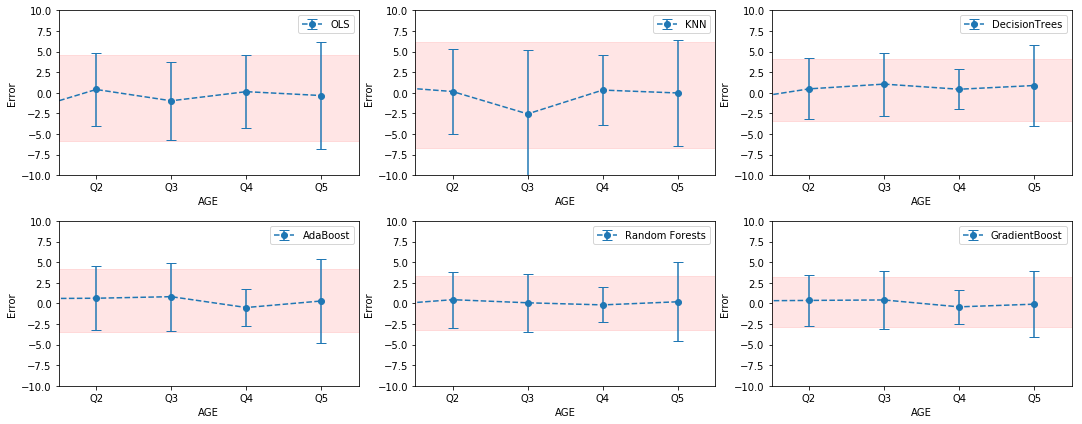

In [46]:
regressors = {"OLS" : LinearRegression(), 
              "KNN" : KNeighborsRegressor(), 
              "DecisionTrees" : DecisionTreeRegressor(), 
              "AdaBoost" : AdaBoostRegressor(random_state=1234), 
              "Random Forests" : RandomForestRegressor(random_state=1234), 
              "GradientBoost" : GradientBoostingRegressor(random_state=1234)
             }

error_dict = {}
score_dict = {}

# You can use the zip() function to iterate over multiple series
for name, regressor in regressors.items():
    model = regressor
    # fit instance
    fit = model.fit(X=X_train, y=y_train)
    # score
    score_dict[name] = r2_score(y_true = y_test, y_pred = model.predict(X=X_test))
    # errors
    error_dict[name] = model.predict(X=X_test) - y_test

print("*** Error along feature values ***")
print("---")
for i in [6]:
    plt.figure(figsize=(15, 6))
    i_name = house_prices["feature_names"][i]
    i_data = np.expand_dims(X_test[:, i], axis=1)
    cbind = np.hstack([i_data] + [error_dict[key].reshape(-1, 1) for key in error_dict.keys()])
    cbind = cbind[cbind[:,0].argsort()]
    err_mean = np.mean(cbind[:,1:], axis=0)
    err_std = np.std(cbind[:,1:], axis=0)
    quintile_data = np.array_split(cbind, 5)
    quintile_min = [min(i[:,0]) for i in quintile_data]
    quintile_max = [max(i[:,0]) for i in quintile_data]
    print("Quintile ranges for {0}: {1}".format(
        i_name, "; ".join(["Q{0} {1} to {2}".format(a+1, b, c) for a, b, c in zip(range(5), quintile_min, quintile_max)]))
         )
    print("---")
    q_err_means = [np.mean(i[:,1:], axis=0) for i in quintile_data]
    q_err_stds = [np.std(i[:,1:], axis=0) for i in quintile_data]
    for k, key in zip(range(len(error_dict.keys())), error_dict.keys()):
        print("{:<20} quintile mean/std {:}; all [{:5.2f}/{:5.2f}]".format(
            key, 
            ", ".join(["[{:5.2f}/{:5.2f}]".format(m[k], s[k]) for m, s in zip(q_err_means, q_err_stds)]), 
            err_mean[k], 
            err_std[k])
        )
        plt.subplot(2, 3, k+1)
        plt.errorbar(list(map(lambda s: "Q"+str(s), range(1, 5+1))), 
                     list(map(lambda m: m[k], q_err_means)), 
                     list(map(lambda m: m[k], q_err_stds)), 
                     label=key, 
                     fmt='--o', 
                     capsize=5)
        plt.axhspan(err_mean[k]-err_std[k], err_mean[k]+err_std[k], alpha=0.1, color='red')
        plt.xlabel(i_name)
        plt.ylabel("Error")
        plt.axis((0.5, 4.5, -10, 10))
        plt.legend()
    plt.tight_layout()
    plt.show()

In [47]:
regressors = {"OLS" : LinearRegression(), 
              "KNN" : KNeighborsRegressor(), 
              "DecisionTrees" : DecisionTreeRegressor(), 
              "AdaBoost" : AdaBoostRegressor(random_state=1234), 
              "Random Forests" : RandomForestRegressor(random_state=1234), 
              "GradientBoost" : GradientBoostingRegressor(random_state=1234)
             }

kf = KFold(n_splits = 5, random_state=1234, shuffle=True)

for name, regressor in regressors.items():
    train_r2s = []
    test_r2s = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = regressor
        # fit instance
        fit = model.fit(X=X_train, y=y_train)
        # R^2
        train_r2s.append(r2_score(y_true = y_train, y_pred = model.predict(X=X_train)))
        test_r2s.append(r2_score(y_true = y_test, y_pred = model.predict(X=X_test)))
    mean_train_r2s = np.mean(train_r2s, axis=0)
    stdev_train_r2s = np.std(train_r2s, axis=0)
    mean_test_r2s = np.mean(test_r2s, axis=0)
    stdev_test_r2s = np.std(test_r2s, axis=0)
    print("{:<20} training R^2s {:} (mean {:5.2f} stdev {:5.2f})".format(name, ", ".join(["{:5.2f}".format(i) for i in train_r2s]), mean_train_r2s, stdev_train_r2s))
    print("{:<20}     test R^2s {:} (mean {:5.2f} stdev {:5.2f})".format(name, ", ".join(["{:5.2f}".format(i) for i in test_r2s]), mean_test_r2s, stdev_test_r2s))
    print("{:<15} train^2 - test R^2 {:} (mean {:5.2f})".format(name, ", ".join(["{:5.2f}".format(i-j) for i, j in zip(train_r2s, test_r2s)]), mean_train_r2s-mean_test_r2s))
    print()

OLS                  training R^2s  0.73,  0.75,  0.73,  0.73,  0.79 (mean  0.74 stdev  0.03)
OLS                      test R^2s  0.77,  0.62,  0.78,  0.79,  0.49 (mean  0.69 stdev  0.12)
OLS             train^2 - test R^2 -0.04,  0.13, -0.05, -0.06,  0.30 (mean  0.05)

KNN                  training R^2s  0.67,  0.71,  0.67,  0.71,  0.72 (mean  0.69 stdev  0.02)
KNN                      test R^2s  0.56,  0.52,  0.69,  0.43,  0.39 (mean  0.52 stdev  0.11)
KNN             train^2 - test R^2  0.11,  0.18, -0.02,  0.28,  0.33 (mean  0.18)

DecisionTrees        training R^2s  1.00,  1.00,  1.00,  1.00,  1.00 (mean  1.00 stdev  0.00)
DecisionTrees            test R^2s  0.79,  0.66,  0.68,  0.87,  0.54 (mean  0.71 stdev  0.11)
DecisionTrees   train^2 - test R^2  0.21,  0.34,  0.32,  0.13,  0.46 (mean  0.29)

AdaBoost             training R^2s  0.90,  0.92,  0.91,  0.90,  0.91 (mean  0.91 stdev  0.01)
AdaBoost                 test R^2s  0.85,  0.80,  0.82,  0.87,  0.69 (mean  0.81 stdev  0.06)

## Test Sets

The idea of the "test set" is to get an idea of how models will perform in real-world conditions. Normally the train/test split above is fine; however, if you're optimizing your models on these test splits, some of that test information is leaking into your models. You're getting less of an idea what it will be like to deploy your models in the real world.

This is why people use train-validation-test splits when they're optimizing a lot of models. The validation set is for tweaking models with different parameters, and the test set is for guessing at the performance with unknown data.

The logic of these sets may be strange at first. Think of the training set as your best-case scenario since it will nearly always be the highest. Then think of your validation set as your "known unknown" scenario, a situation with new but familiar data. Your test set should be closest to your worst case scenario, when data is completely unknown.

The tougher your test set it, the easier it will be to spot the truly robust models from the flimsy ones. If a model works well with a tough test set, it has generalized well.

In [15]:
# Create train/test split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, shuffle=True, random_state=1234)

We'll perform a grid search of parameters here. A very useful function for this is `itertools.product`, which finds all combinations of items among lists. It's equivalent to a nested for-loop.

With the `GradientBoostingRegressor` we'll try a ton of different parameters to see which work best.

In [16]:
results = []

for n, m in itertools.product(
    [5, 10, 25, 50, 100], 
    ["auto", "sqrt", "log2"]
    ):
    model = RandomForestRegressor(n_estimators=n, max_features=m, random_state=1234)
    # fit instance
    fit = model.fit(X=X_train, y=y_train)
    # R^2
    train_score = r2_score(y_true = y_train, y_pred = model.predict(X=X_train))
    valid_score = r2_score(y_true = y_valid, y_pred = model.predict(X=X_valid))
    test_score = r2_score(y_true = y_test, y_pred = model.predict(X=X_test))
    oob_score = fit.oob_score
    
    results.append({"n":n, "m":m, "train_score":train_score, "valid_score":valid_score, "test_score":test_score})
    
# print results
for score_type in ["train_score", "valid_score", "test_score"]:
    print("Top 5 according to {0}".format(score_type))
    results.sort(key=lambda x: x[score_type], reverse=True)
    i=1
    for row in results:
        print("{:5}.  n: {:3.0f} / m: {:} | training R^2 {:5.2f} | valid R^2 {:5.2f} | test R^2 {:5.2f} | oob R^2 {:5.2f}".format(
            i, row["n"], row["m"], row["train_score"], row["valid_score"], row["test_score"], row["oob_score"]
        ))
        i+=1
        if i > 5: break

/home/toaster/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/toaster/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/toaster/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/toaster/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

Top 10 according to train_score
    1.  n: 100 / m: sqrt | training R^2  0.98 | valid R^2  0.85 | test R^2  0.87 | oob R^2  1.00
    2.  n: 100 / m: log2 | training R^2  0.98 | valid R^2  0.85 | test R^2  0.87 | oob R^2  1.00
    3.  n:  50 / m: sqrt | training R^2  0.98 | valid R^2  0.84 | test R^2  0.86 | oob R^2  1.00
    4.  n:  50 / m: log2 | training R^2  0.98 | valid R^2  0.84 | test R^2  0.86 | oob R^2  1.00
    5.  n: 100 / m: auto | training R^2  0.98 | valid R^2  0.85 | test R^2  0.91 | oob R^2  1.00
    6.  n:  50 / m: auto | training R^2  0.98 | valid R^2  0.84 | test R^2  0.90 | oob R^2  1.00
    7.  n:  25 / m: sqrt | training R^2  0.98 | valid R^2  0.83 | test R^2  0.85 | oob R^2  1.00
    8.  n:  25 / m: log2 | training R^2  0.98 | valid R^2  0.83 | test R^2  0.85 | oob R^2  1.00
    9.  n:  25 / m: auto | training R^2  0.97 | valid R^2  0.86 | test R^2  0.90 | oob R^2  1.00
   10.  n:  10 / m: auto | training R^2  0.97 | valid R^2  0.86 | test R^2  0.90 | oob R^2  1.0

In [9]:
# CHAS is variable 3
river_indexes = np.flatnonzero(X[:,3] == 1)
river_mask = np.ones(X.shape[0], np.bool)
river_mask[river_indexes] = 0

In [10]:
# Create train/test split
X_, X_test, y_, y_test = X[river_mask,], X[river_indexes,], y[river_mask], y[river_indexes]
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.3)

In [23]:
results = []

for l, n, d in itertools.product(
    np.random.uniform(low=0.01, high=1.0, size=20), 
    np.random.randint(5, high=200, size=20), 
    [1, 2, 3, 4, 5]):
    model = GradientBoostingRegressor(learning_rate=l, n_estimators=n, max_depth=d, random_state=1234)
    # fit instance
    fit = model.fit(X=X_train, y=y_train)
    # R^2
    train_score = r2_score(y_true = y_train, y_pred = model.predict(X=X_train))
    valid_score = r2_score(y_true = y_valid, y_pred = model.predict(X=X_valid))
    test_score = r2_score(y_true = y_test, y_pred = model.predict(X=X_test))
    
    results.append({"l":l, "n":n, "d":d, "train_score":train_score, "valid_score":valid_score, "test_score":test_score})
    
# rank results
for score_type in ["train_score", "valid_score", "test_score"]:
    results.sort(key=lambda x: x[score_type], reverse=True)
    for i in range(len(results)):
        results[i][score_type+"_rank"] = i+1
    print("Top {:}: {:5.2f}".format(score_type, results[0][score_type]))

# print results
for score_type in ["train_score", "valid_score", "test_score"]:
    print("Top 10 results by {0}".format(score_type))
    results.sort(key=lambda x: x[score_type], reverse=True)
    i=1
    for row in results:
        print("{:5}.  l: {:4.2f} / n: {:3.0f} / d: {:} | training R^2 {:5.2f} #{:<2} | valid R^2 {:5.2f} #{:<2} | test R^2 {:5.2f} #{:<2}".format(
            i, row["l"], row["n"], row["d"], row["train_score"], row["train_score_rank"], row["valid_score"], row["valid_score_rank"], 
            row["test_score"], row["test_score_rank"]
        ))
        i+=1
        if i > 10: break

Top train_score:  1.00
Top valid_score:  0.98
Top test_score:  0.83
Top 10 results by train_score
    1.  l: 0.90 / n: 143 / d: 4 | training R^2  1.00 #1  | valid R^2  0.95 #1238 | test R^2  0.66 #1383
    2.  l: 0.90 / n: 147 / d: 4 | training R^2  1.00 #2  | valid R^2  0.95 #1239 | test R^2  0.66 #1384
    3.  l: 0.90 / n: 150 / d: 4 | training R^2  1.00 #3  | valid R^2  0.95 #1240 | test R^2  0.66 #1385
    4.  l: 0.90 / n: 143 / d: 4 | training R^2  1.00 #4  | valid R^2  0.95 #1241 | test R^2  0.66 #1386
    5.  l: 0.90 / n: 175 / d: 4 | training R^2  1.00 #5  | valid R^2  0.95 #1242 | test R^2  0.66 #1387
    6.  l: 0.90 / n: 147 / d: 4 | training R^2  1.00 #6  | valid R^2  0.95 #1243 | test R^2  0.66 #1388
    7.  l: 0.81 / n: 143 / d: 5 | training R^2  1.00 #7  | valid R^2  0.96 #853 | test R^2  0.64 #1669
    8.  l: 0.81 / n: 147 / d: 5 | training R^2  1.00 #8  | valid R^2  0.96 #854 | test R^2  0.64 #1670
    9.  l: 0.81 / n: 141 / d: 5 | training R^2  1.00 #9  | valid R^2  0.